```
python -m clrs.examples.run --dataset_path ./  --seed 42 --algorithms bellman_ford --processor_type pgn \
--train_steps 30000
```

In [24]:
import numpy as np
!python ../clrs/examples/run.py --dataset_path ./  --seed 42 --algorithms bellman_ford --processor_type pgn

^C


In [200]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding as LLE
import matplotlib.pyplot as plt
import pickle

In [284]:
def load(x):
    with open(x, 'rb') as file:
        return pickle.load(file)

def run_experiment(name: str):
    trajs = load(name)


    # Global plots
    trajs_squashed = trajs[:,1:,:].reshape((-1, 128))
    trajs_TSNE = TSNE(n_components=2, learning_rate='auto', init='random',perplexity=30).fit_transform(trajs_squashed)
    trajs_PCA = PCA(n_components=2).fit_transform(trajs_squashed)
    # trajs_HLLE = LLE(n_components=2, n_neighbors=30, method='hessian').fit_transform(trajs_squashed)

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    for i in range(4):
        def plot_helper(j, x):
            ax[j].scatter(x[i:-1:4,0], x[i:-1:4,1], label=f'mp step {i+1}')
        plot_helper(0, trajs_TSNE)
        plot_helper(1, trajs_PCA)

    ax[0].legend()
    ax[0].set_title("T-SNE")
    ax[1].legend()
    ax[1].set_title("PCA")

    # Stepwise plots

    # 2D PCA
    fig, ax = plt.subplots(1, 4, figsize=(16,4))
    fig.suptitle("PCA of latents after _ mp steps")
    for i in range(4):
        ax[i].set_title(f"{i+1}")
        trajs_reduced = PCA(n_components=2).fit_transform(trajs[:,i+1,:])
        ax[i].scatter(trajs_reduced[:,0], trajs_reduced[:,1], c=np.arange(0,64), cmap='plasma')
        ax[i].plot(trajs_reduced[:,0], trajs_reduced[:,1], alpha=0.1)


    # 3D PCA
    fig, ax = plt.subplots(1, 4, figsize=(16,4), subplot_kw=dict(projection='3d'))
    fig.suptitle("PCA of latents after _ mp steps")
    for i in range(4):
        ax[i].set_title(f"{i+1}")
        trajs_reduced = PCA(n_components=3).fit_transform(trajs[:,i+1,:])
        ax[i].scatter3D(trajs_reduced[:,0], trajs_reduced[:,1], trajs_reduced[:,2], c=np.arange(0,64), cmap='plasma')
        ax[i].plot3D(trajs_reduced[:,0], trajs_reduced[:,1], trajs_reduced[:,2], alpha=0.1)

    # 3D TSNE
    fig, ax = plt.subplots(1, 4, figsize=(16,4), subplot_kw=dict(projection='3d'))
    fig.suptitle("TSNE of latents after _ mp steps")
    for i in range(4):
        ax[i].set_title(f"{i+1}")
        trajs_reduced = TSNE(n_components=3, learning_rate='auto', init='random',perplexity=8)\
            .fit_transform(trajs[:,i+1,:])
        ax[i].scatter(trajs_reduced[:,0], trajs_reduced[:,1], trajs_reduced[:,2], c=np.arange(0,64), cmap='plasma')
        ax[i].plot(trajs_reduced[:,0], trajs_reduced[:,1], trajs_reduced[:,2],  alpha=0.1)


# Without noise

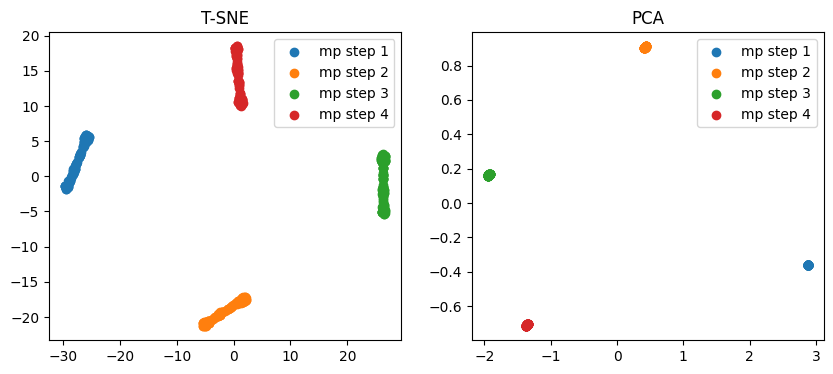

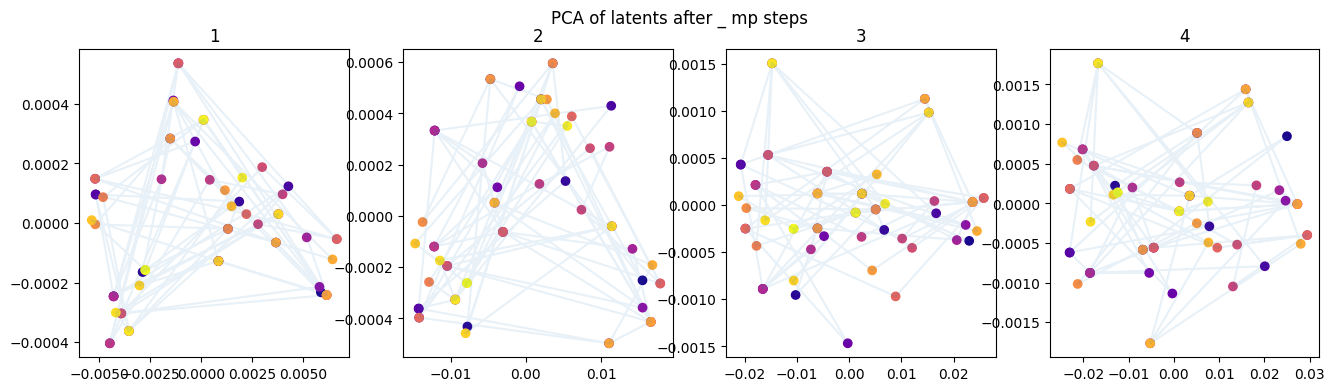

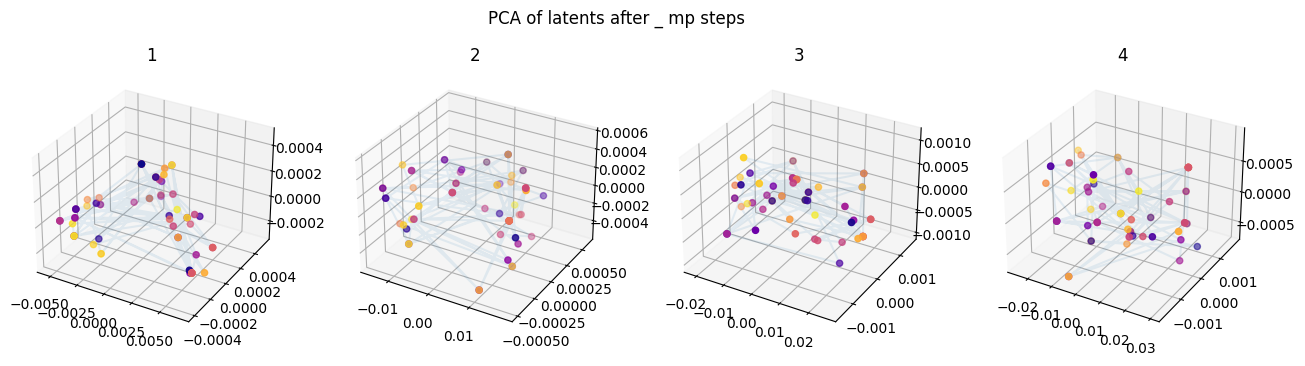

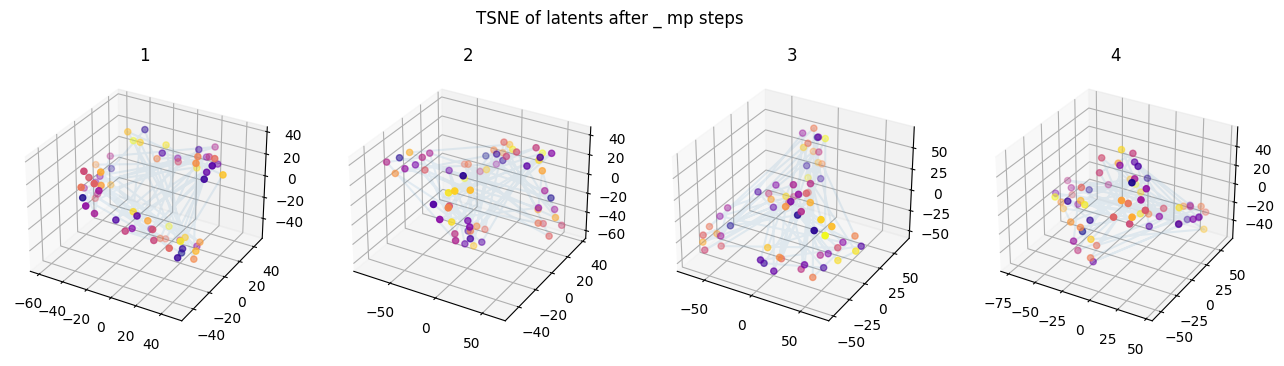

In [288]:
run_experiment('trajs_no_noise_inc_per10000.pkl')

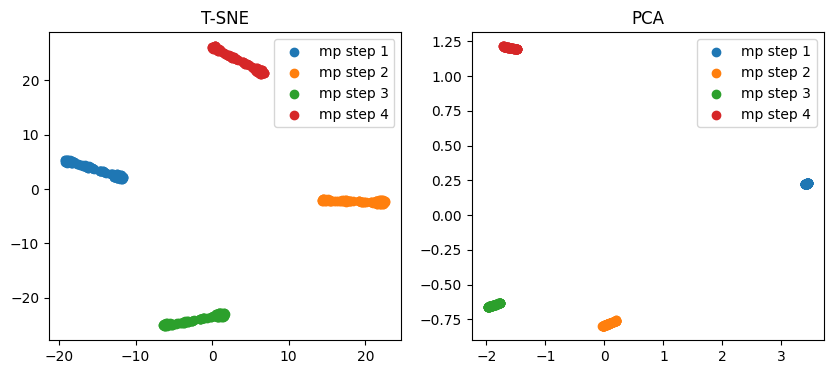

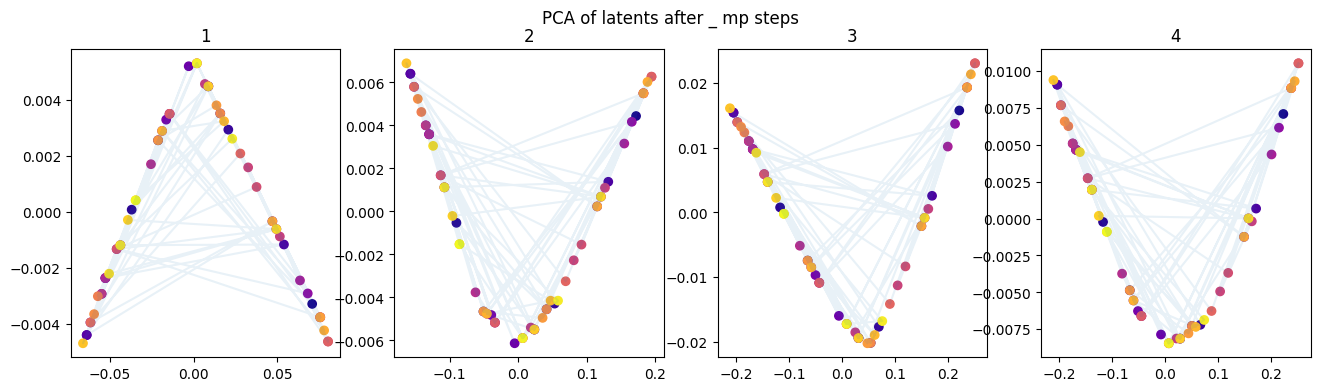

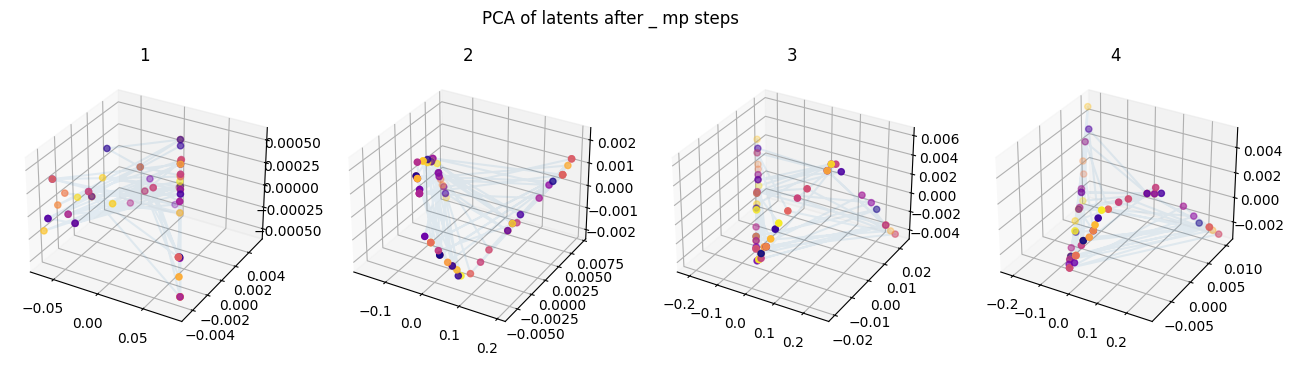

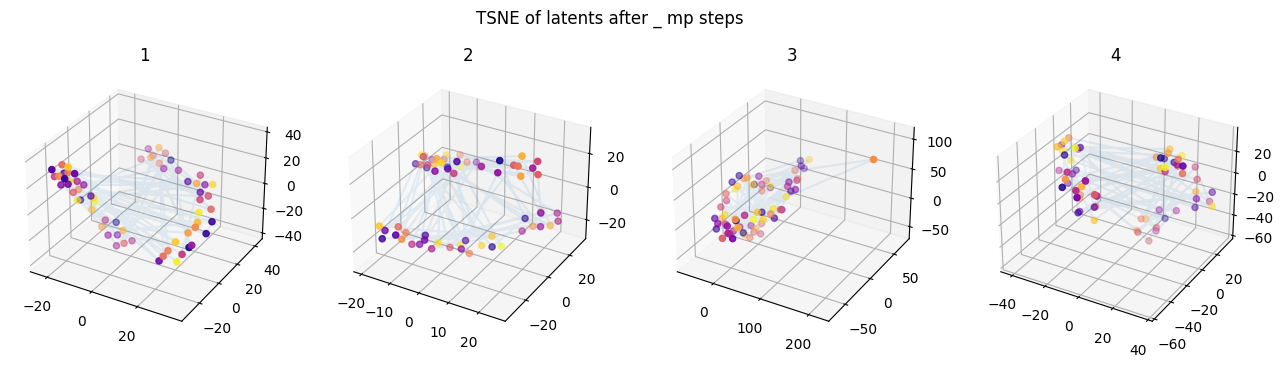

In [285]:
run_experiment('trajs_no_noise_inc_per1000.pkl')

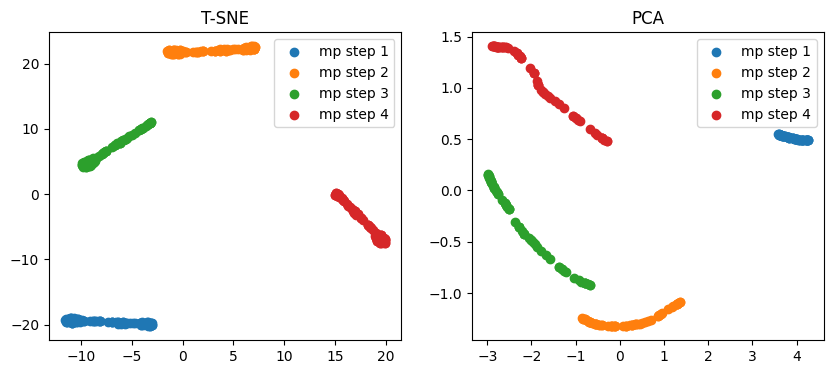

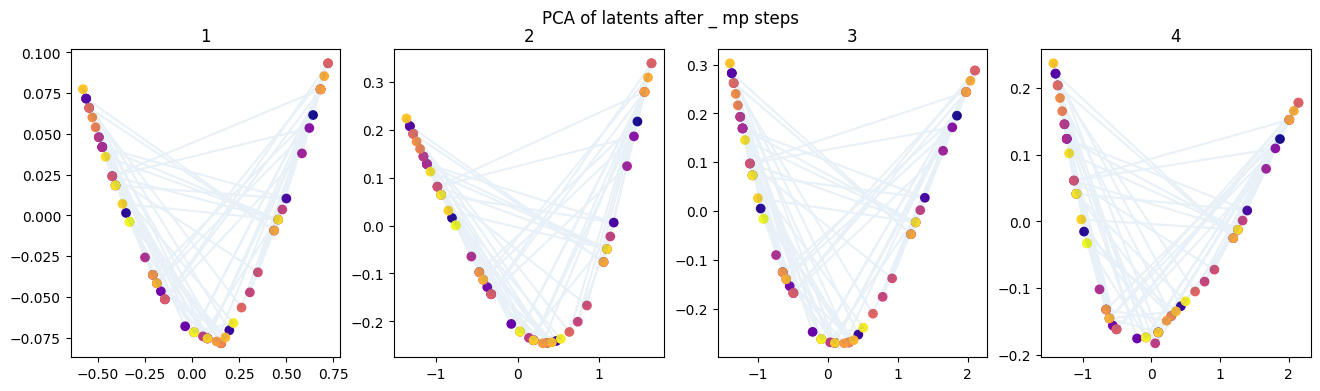

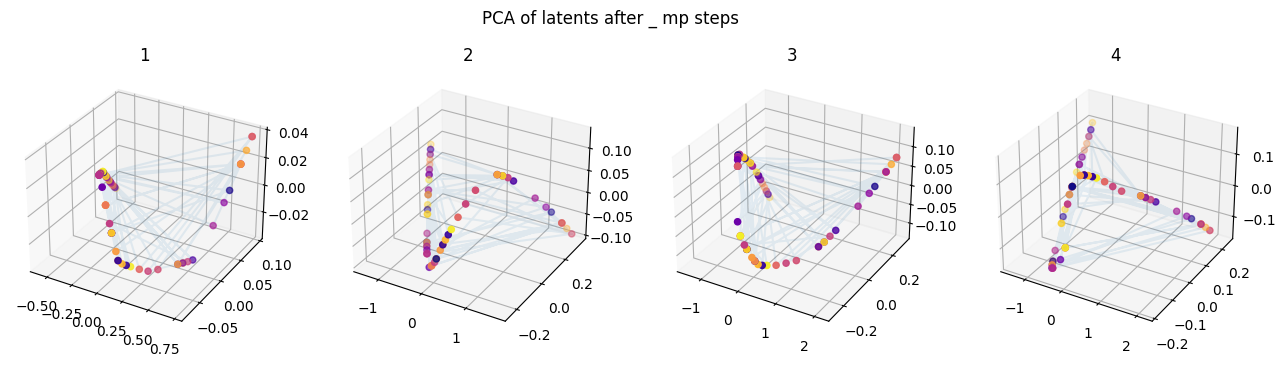

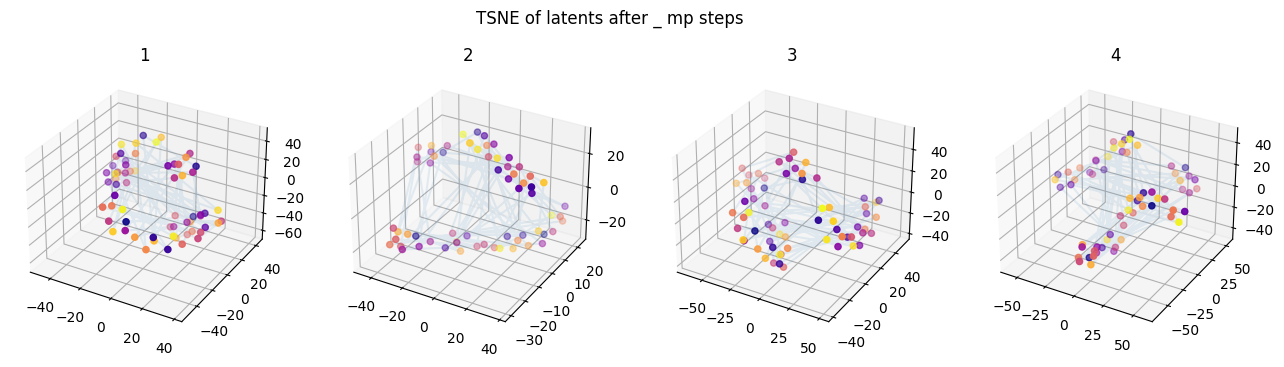

In [286]:
run_experiment('trajs_no_noise_inc_per100.pkl')

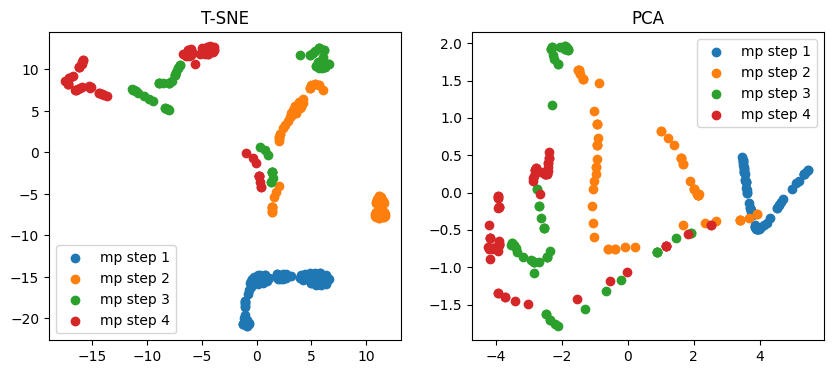

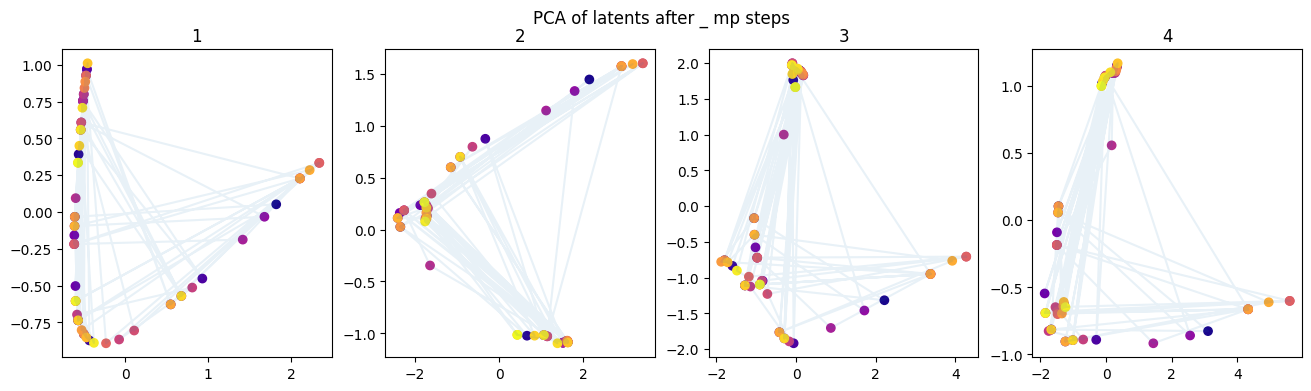

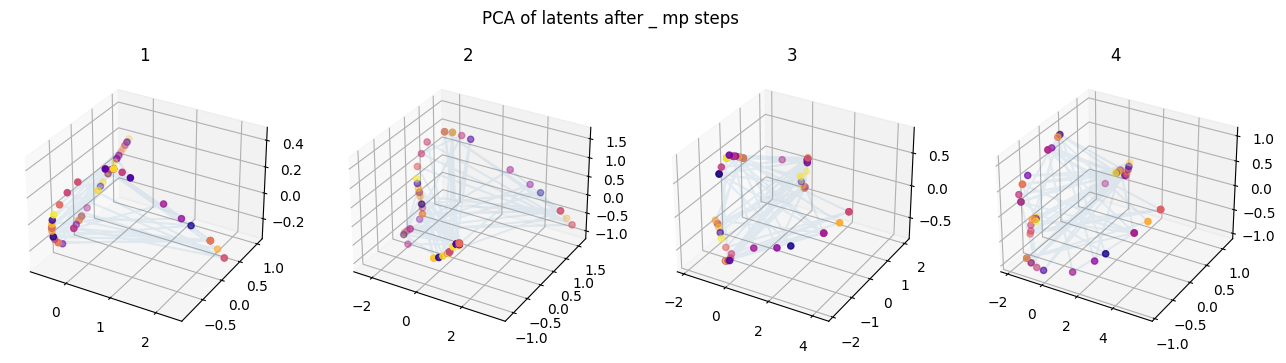

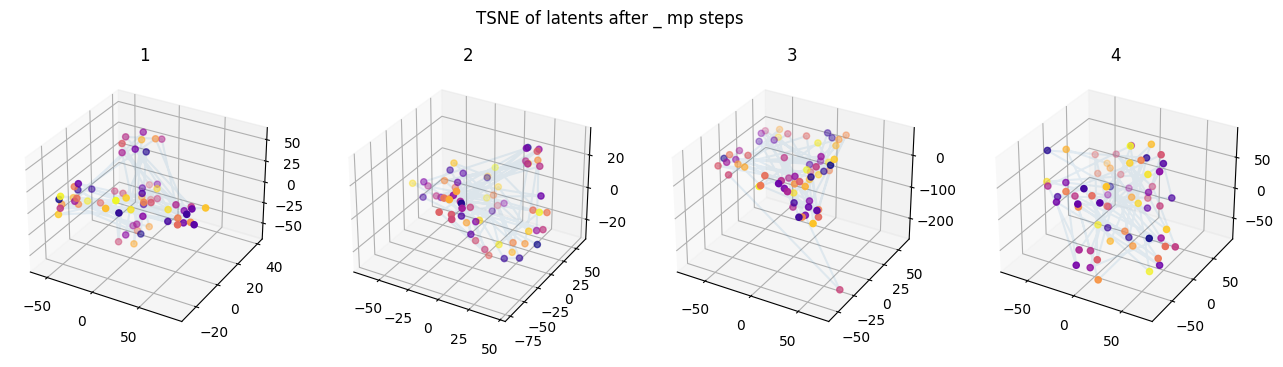

In [287]:
run_experiment('trajs_no_noise_inc_per10.pkl')

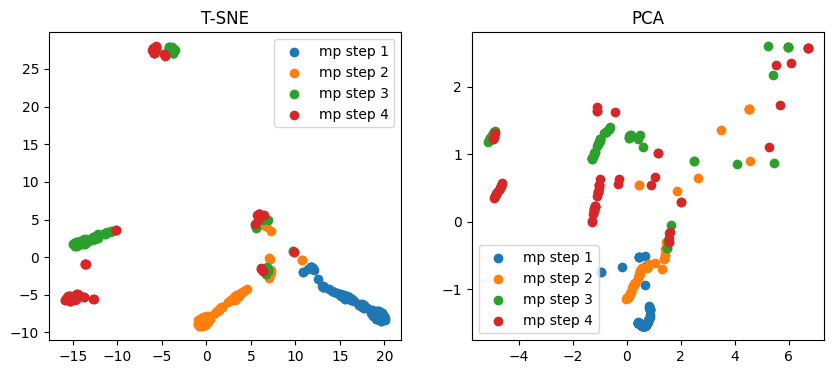

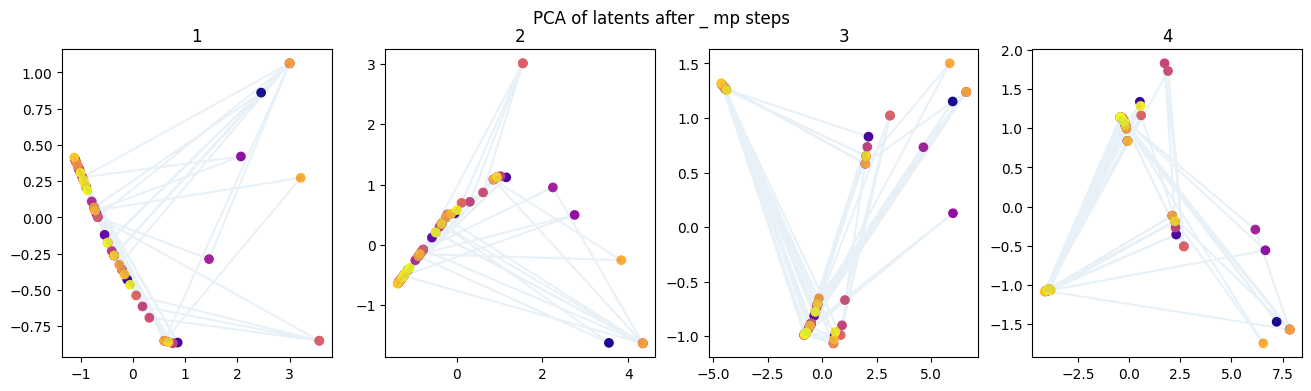

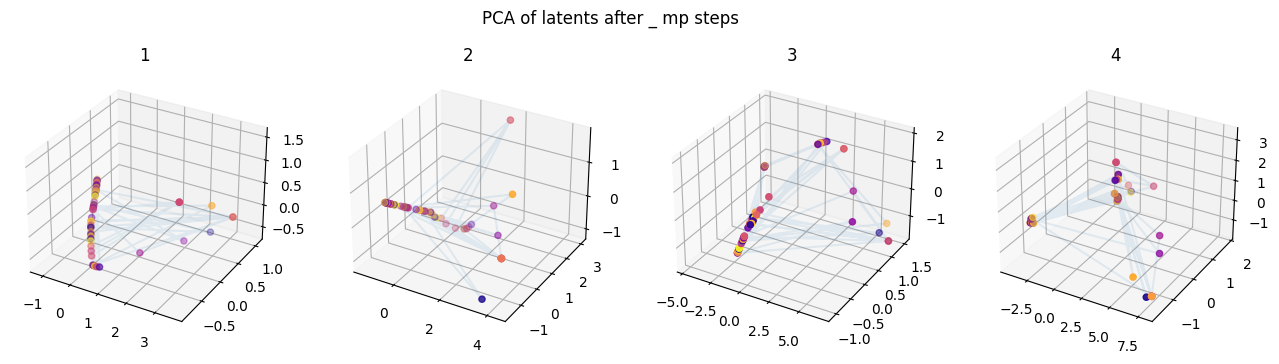

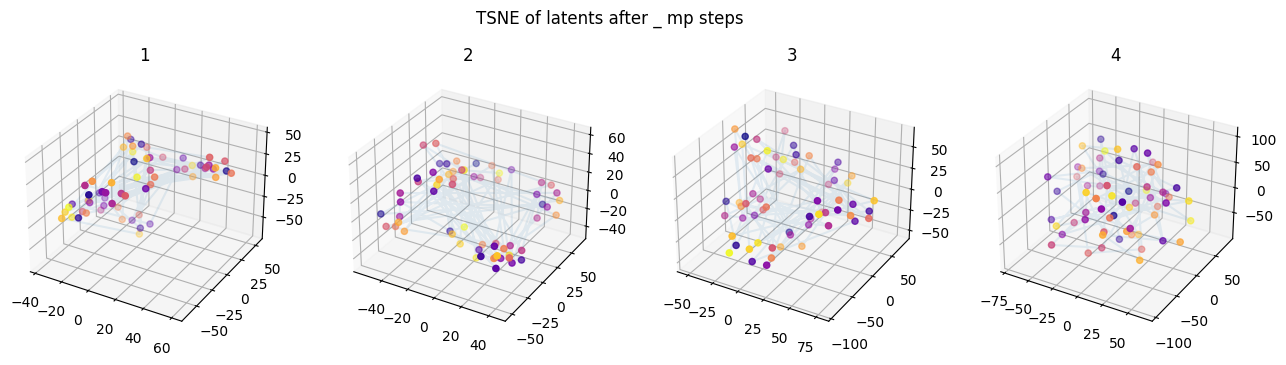

In [291]:
run_experiment('trajs_no_noise_inc_per1.pkl')

# With noise